<a href="https://colab.research.google.com/github/vediicaa/ChargeGenie/blob/main/ChargeGenie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [ ]:
df = pd.read_csv(r"/content/Train-Doc.csv", encoding='iso-8859-1')
df.sentences=df.sentences.astype(str)
#df = pd.read_csv("Train-Doc.csv", encoding='iso-8859-1')
df.info() ## info of the dataframe ##
df.head(n=5) ## top-5 values of the dataframe ##

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4148 entries, 0 to 4147
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Unnamed: 0                             4148 non-null   int64 
 1   case_id                                4148 non-null   object
 2   sentences                              4148 non-null   object
 3   doc_tags                               4148 non-null   object
 4   hurt                                   4148 non-null   int64 
 5   murder                                 4148 non-null   int64 
 6   theft                                  4148 non-null   int64 
 7   wrongful restraint                     4148 non-null   int64 
 8   kidnapping                             4148 non-null   int64 
 9   unlawful assembly                      4148 non-null   int64 
 10  general explanations                   4148 non-null   int64 
 11  lawful authority 

,Unnamed: 0,case_id,sentences,doc_tags,hurt,murder,theft,wrongful restraint,kidnapping,unlawful assembly,...,private defence,offence related to armed forces,offence affecting public safety,criminal intimidation,elections,coin and stamp,cruelty by husband,causing miscarriage,criminal breach of contract,weights and measures
0,0,1953_A_4,The case of the prosecution was that at or abo...,['hurt'],1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1953_H_2,The appellant before us who in the year 1947 w...,['murder'],0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1953_N_8,The prosecution case briefly stated was follow...,"['murder', 'theft']",0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1953_S_46,Cochin Penal Code corresponding to Ss 409 420 ...,['wrongful restraint'],0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1953_S_47,The prosecution story is that Lalman and Thann...,"['kidnapping', 'murder', 'unlawful assembly']",0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_data = df.sample(frac=1, replace=True, random_state=1)
## Check for Null Values ##
df_data.isnull().sum()

Unnamed: 0                               0
case_id                                  0
sentences                                0
doc_tags                                 0
hurt                                     0
murder                                   0
theft                                    0
wrongful restraint                       0
kidnapping                               0
unlawful assembly                        0
general explanations                     0
lawful authority of public servant       0
introduction                             0
criminal force                           0
criminal breach of trust                 0
cheating                                 0
offence by public servant                0
criminal conspiracy                      0
forgery                                  0
abetment                                 0
robbery                                  0
offence against public justice           0
extortion                                0
criminal tr

**Word Preprocessing**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
wpt = nltk.WordPunctTokenizer()
stop_words_init = nltk.corpus.stopwords.words('english')
stop_words = [i for i in stop_words_init if i not in ('not','and','for')]
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't

In [ ]:
def normalize_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    return text

In [ ]:
df_data['sentences'].head(n=5)

235     The facts found by the Court of Session for co...
3980    I was sleeping in my house at that time Then m...
905     30 noon and that action of the appellant and h...
2763    1999 at Patna according to the Muslim Law The ...
2895    The prosecution case as unfolded before the tr...
Name: sentences, dtype: object

In [ ]:
df_data['sentences'] = df_data['sentences'].apply(lambda x: normalize_text(x))

df_data['sentences'].head(n=5)

235     the facts found by the court of session for co...
3980    i was sleeping in my house at that time then m...
905       noon and that action of the appellant and hi...
2763      at patna according to the muslim law the oth...
2895    the prosecution case as unfolded before the tr...
Name: sentences, dtype: object

In [ ]:
processed_list = []
for j in df_data['sentences']:
    process = j.replace('...','')
    processed_list.append(process)
    
df_processed = pd.DataFrame(processed_list)
df_processed.columns = ['sentences']
df_processed.head(n=5)

,sentences
0,the facts found by the court of session for co...
1,i was sleeping in my house at that time then m...
2,noon and that action of the appellant and hi...
3,at patna according to the muslim law the oth...
4,the prosecution case as unfolded before the tr...


 Now, checking the label's availabel per classes

In [ ]:
labels=['hurt','murder','theft','wrongful restraint','kidnapping','unlawful assembly','general explanations','lawful authority of public servant','introduction','criminal force','criminal breach of trust','cheating','offence by public servant','criminal conspiracy','forgery','abetment','robbery','offence against public justice','extortion','criminal trespass','marriage offence','sexual offence','offence related to religion','defamation','punishments','general exceptions','criminal misappropriation of property','attempt to commit offence','receiving stolen property','mischief','offence against state','private defence','offence related to armed forces','offence affecting public safety','criminal intimidation','elections','coin and stamp','cruelty by husband','causing miscarriage','criminal breach of contract','weights and measures']
targets=df_data[labels].values

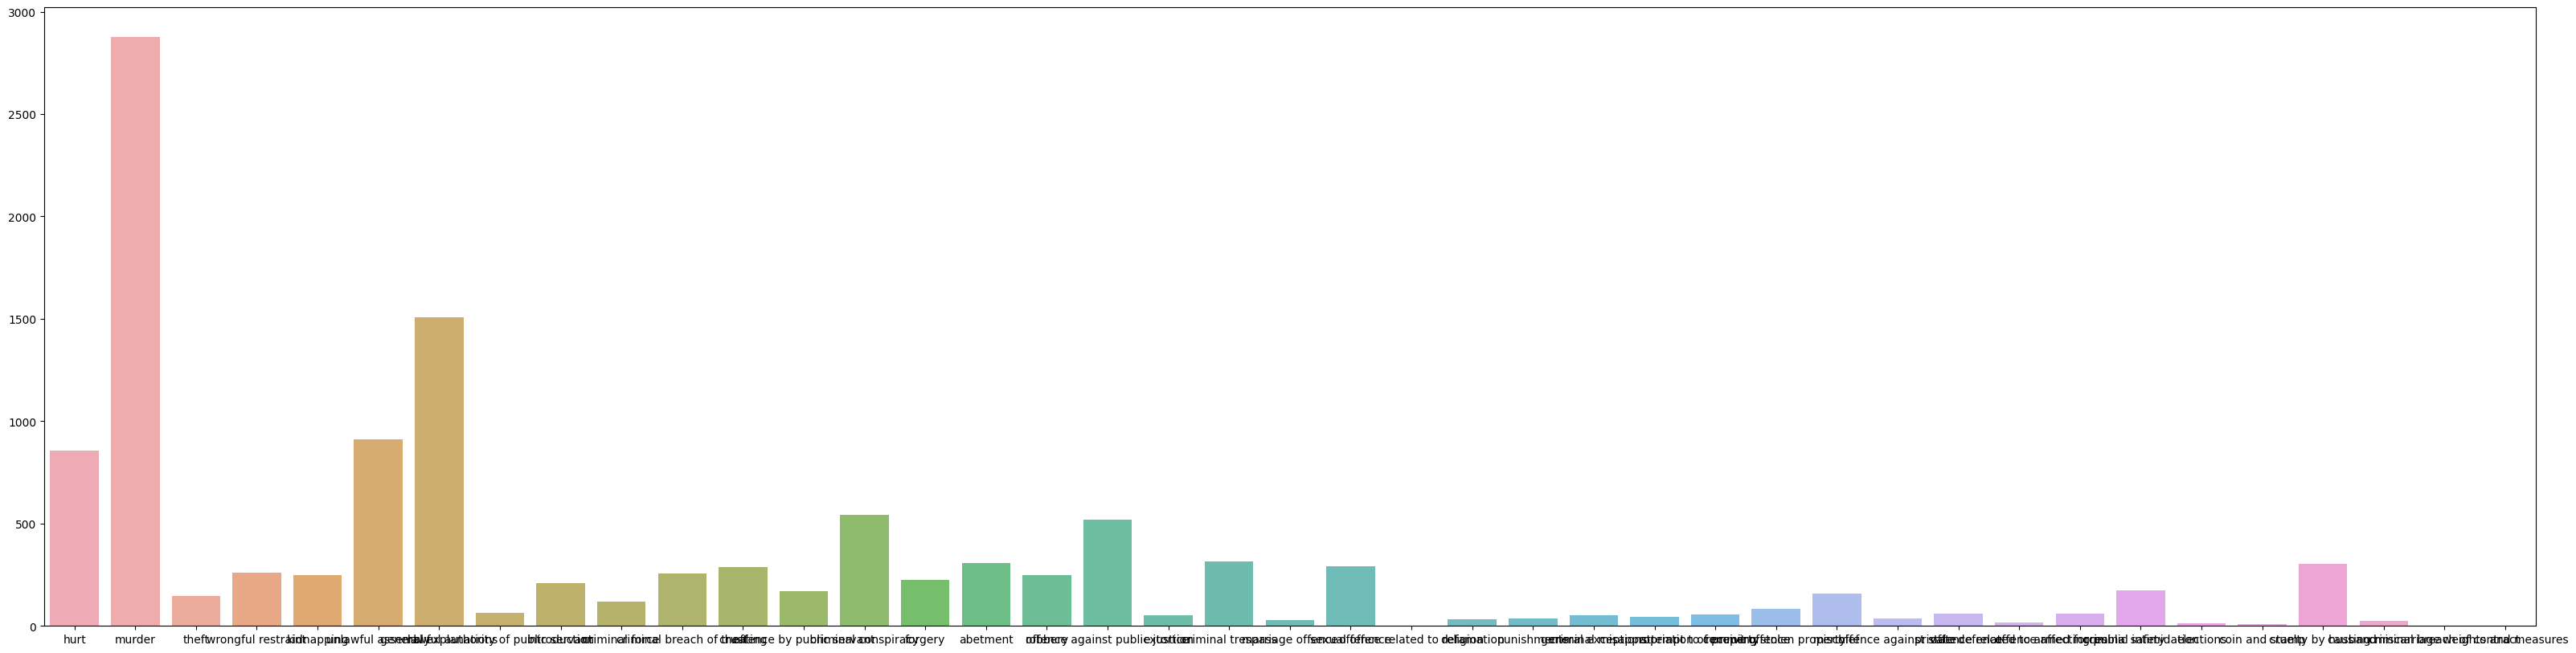

In [ ]:
import matplotlib.pyplot as plt

val_counts = df_data[labels].sum()
plt.figure(figsize=(40,10))
ax = sns.barplot(x=val_counts.index,y= val_counts.values, alpha=0.8)

In [ ]:
print(val_counts.index)
print(val_counts)

Index(['hurt', 'murder', 'theft', 'wrongful restraint', 'kidnapping',
       'unlawful assembly', 'general explanations',
       'lawful authority of public servant', 'introduction', 'criminal force',
       'criminal breach of trust', 'cheating', 'offence by public servant',
       'criminal conspiracy', 'forgery', 'abetment', 'robbery',
       'offence against public justice', 'extortion', 'criminal trespass',
       'marriage offence', 'sexual offence', 'offence related to religion',
       'defamation', 'punishments', 'general exceptions',
       'criminal misappropriation of property', 'attempt to commit offence',
       'receiving stolen property', 'mischief', 'offence against state',
       'private defence', 'offence related to armed forces',
       'offence affecting public safety', 'criminal intimidation', 'elections',
       'coin and stamp', 'cruelty by husband', 'causing miscarriage',
       'criminal breach of contract', 'weights and measures'],
      dtype='object')
hurt

In [ ]:
rects = ax.patches
labels = val_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label, ha="center", va="bottom")

plt.show()

In [ ]:
X = list(df_processed['sentences'])
labels=df_data[['hurt','murder','theft','wrongful restraint','kidnapping','unlawful assembly','general explanations','lawful authority of public servant','introduction','criminal force','criminal breach of trust','cheating','offence by public servant','criminal conspiracy','forgery','abetment','robbery','offence against public justice','extortion','criminal trespass','marriage offence','sexual offence','offence related to religion','defamation','punishments','general exceptions','criminal misappropriation of property','attempt to commit offence','receiving stolen property','mischief','offence against state','private defence','offence related to armed forces','offence affecting public safety','criminal intimidation','elections','coin and stamp','cruelty by husband','causing miscarriage','criminal breach of contract','weights and measures']
]
y= labels.values

In [ ]:
import numpy as np
import pandas as pd

def get_classes(y) -> int:
    """
    Get the total number of classes.
    Args:
        y : The labels list of the data.
    Returns:
        int: Number of total classes
    """

    return int(y.shape[1])


def get_sum_classes(y) -> list:
    """
    Get the number of samples per class
    Args:
        y : Labels of the data
    Returns:
        list: [description]
    """

    if isinstance(y, pd.DataFrame):
        return pd.DataFrame(y).sum().tolist()
    if isinstance(y, np.ndarray):
        return y.sum(axis=0)

In [ ]:
def get_tail_label(df):
    """
    Give tail label colums of the given target dataframe
    
    args
    df: pandas.DataFrame, target label df whose tail label has to identified
    
    return
    tail_label: list, a list containing column name of all the tail label
    """
    columns = df.columns
    n = len(columns)
    irpl = np.zeros(n)
    for column in range(n):
        irpl[column] = df[columns[column]].value_counts()[1]
    irpl = max(irpl)/irpl
    mir = np.average(irpl)
    tail_label = []
    for i in range(n):
        if irpl[i] > mir:
            tail_label.append(columns[i])
    return tail_label

In [ ]:
def get_index(df):
  """
  give the index of all tail_label rows
  args
  df: pandas.DataFrame, target label df from which index for tail label has to identified
    
  return
  index: list, a list containing index number of all the tail label
  """
  tail_labels = get_tail_label(df)
  index = set()
  for tail_label in tail_labels:
    sub_index = set(df[df[tail_label]==1].index)
    index = index.union(sub_index)
  return list(index)

In [ ]:
def get_minority_instace(X, y):
    """
    Give minority dataframe containing all the tail labels
    
    args
    X: pandas.DataFrame, the feature vector dataframe
    y: pandas.DataFrame, the target vector dataframe
    
    return
    X_sub: pandas.DataFrame, the feature vector minority dataframe
    y_sub: pandas.DataFrame, the target vector minority dataframe
    """
    index = get_index(y)
    X_sub = X[X.index.isin(index)].reset_index(drop = True)
    y_sub = y[y.index.isin(index)].reset_index(drop = True)
    return X_sub, y_sub

In [ ]:
def nearest_neighbour(X):
    """
    Give index of 5 nearest neighbor of all the instance
    
    args
    X: np.array, array whose nearest neighbor has to find
    
    return
    indices: list of list, index of 5 NN of each element in X
    """
    nbs=NearestNeighbors(n_neighbors=5,metric='euclidean',algorithm='kd_tree').fit(X)
    euclidean,indices= nbs.kneighbors(X)
    return indices

In [ ]:
def MLSMOTE(X,y, n_sample):
    """
    Give the augmented data using MLSMOTE algorithm
    
    args
    X: pandas.DataFrame, input vector DataFrame
    y: pandas.DataFrame, feature vector dataframe
    n_sample: int, number of newly generated sample
    
    return
    new_X: pandas.DataFrame, augmented feature vector data
    target: pandas.DataFrame, augmented target vector data
    """
    indices2 = nearest_neighbour(X)
    n = len(indices2)
    new_X = np.zeros((n_sample, X.shape[1]))
    target = np.zeros((n_sample, y.shape[1]))
    for i in range(n_sample):
        reference = random.randint(0,n-1)
        neighbour = random.choice(indices2[reference,1:])
        all_point = indices2[reference]
        nn_df = y[y.index.isin(all_point)]
        ser = nn_df.sum(axis = 0, skipna = True)
        target[i] = np.array([1 if val>2 else 0 for val in ser])
        ratio = random.random()
        gap = X.loc[reference,:] - X.loc[neighbour,:]
        new_X[i] = np.array(X.loc[reference,:] + ratio * gap)
    new_X = pd.DataFrame(new_X, columns=X.columns)
    target = pd.DataFrame(target, columns=y.columns)
    new_X = pd.concat([X, new_X], axis=0)
    target = pd.concat([y, target], axis=0)
    return new_X, target

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15, train_size=0.85)

In [ ]:
from imblearn.under_sampling import NearMiss
sm=NearMiss()
x_train_res,y_train_res=sm.fit_resample(x_train,y_train)

ValueError: ignored

MODEL CREATION

In [ ]:
t = ['1994 and the couple has two daughters and one son 30 pm when PW1 was in the house situated at Gandhi Nagar Bellary the appellant abused PW1 and her father PW2 in filthy language and appellant pushed PW2 and voluntarily caused simple hurt to him The accusedappellant had remarried and has three children through his second wife who are to be educated The appellant through his first wife has two daughters and one son and one daughter is said to be pursuing engineering course The appellant has to take care of his aged parents']

In [ ]:
print(t)

['1994 and the couple has two daughters and one son 30 pm when PW1 was in the house situated at Gandhi Nagar Bellary the appellant abused PW1 and her father PW2 in filthy language and appellant pushed PW2 and voluntarily caused simple hurt to him The accusedappellant had remarried and has three children through his second wife who are to be educated The appellant through his first wife has two daughters and one son and one daughter is said to be pursuing engineering course The appellant has to take care of his aged parents']


In [ ]:
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import Bidirectional,GRU,concatenate,SpatialDropout1D
from keras.layers import GlobalMaxPooling1D,GlobalAveragePooling1D,Conv1D
from keras.models import Model
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers import Concatenate
import matplotlib.pyplot as plt
from keras import layers
from keras.optimizers import Adam,SGD,RMSprop

In [ ]:
max_len = 100
max_features = 7492
embed_size = 300

In [ ]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(x_train)+list(x_test))

x_train = tokenizer.texts_to_sequences(x_train)
x_test= tokenizer.texts_to_sequences(x_test)


x_train = pad_sequences(x_train, padding='post', maxlen=max_len)
x_test = pad_sequences(x_test, padding='post', maxlen=max_len)

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros
embeddings_dictionary = dict()

In [ ]:
glove_file = open('glove.6B.300d.txt', encoding="utf-8") ## using pre-trained or self-trained embeddings ##

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

vocab_size = len(tokenizer.word_index) + 1  ## total distinct words is the Vocabulary ##
word_index = tokenizer.word_index
num_words = min(max_features,len(word_index)+1)

embedding_matrix = zeros((num_words, embed_size)) ## has to be similar to glove dimension ##
for word, index in tokenizer.word_index.items():
    if index >= max_features:
        continue
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        

In [ ]:
s=pd.DataFrame(embedding_matrix)
s.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.046560,0.213180,-0.007436,-0.45854,-0.035639,0.236430,-0.288360,0.215210,-0.134860,-1.6413,...,-0.013064,-0.29686,-0.079913,0.195000,0.031549,0.285060,-0.087461,0.009061,-0.209890,0.053913
2,0.038466,-0.039792,0.082747,-0.38923,-0.214310,0.170200,-0.025657,0.095780,0.238600,-1.6342,...,0.045194,-0.20405,-0.210970,-0.110250,0.021766,0.441290,0.327970,-0.334270,0.011807,0.059703
3,-0.076947,-0.021211,0.212710,-0.72232,-0.139880,-0.122340,-0.175210,0.121370,-0.070866,-1.5721,...,-0.366730,-0.38603,0.302900,0.015747,0.340360,0.478410,0.068617,0.183510,-0.291830,-0.046533
4,-0.257560,-0.057132,-0.671900,-0.38082,-0.364210,-0.082155,-0.010955,-0.082047,0.460560,-1.8477,...,-0.012806,-0.59707,0.317340,-0.252670,0.543840,0.063007,-0.049795,-0.160430,0.046744,-0.070621


In [ ]:
from keras import backend as K

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


In [ ]:
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


In [ ]:
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
from keras.layers import *
from keras.models import *
from keras import backend as K

In [ ]:
SINGLE_ATTENTION_VECTOR=False
def attention_3d_block(inputs):
    # inputs.shape = (batch_size, time_steps, input_dim)
    input_dim = int(inputs.shape[2])
    print(input_dim)
    a = inputs
    #a = Permute((2, 1))(inputs)
    #a = Reshape((input_dim, TIME_STEPS))(a) # this line is not useful. It's just to know which dimension is what.
    a = Dense(input_dim, activation='softmax')(a)
    if SINGLE_ATTENTION_VECTOR:
        a = Lambda(lambda x: K.mean(x, axis=1), name='dim_reduction')(a)
        a = RepeatVector(input_dim)(a)
    a_probs = Permute((1, 2), name='attention_vec')(a)

    #output_attention_mul = merge([inputs, a_probs], name='attention_mul', mode='mul')
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul

In [ ]:
sequence_input = Input(shape=(max_len, ))
x = Embedding(max_features, embed_size, weights=[embedding_matrix],trainable = False)(sequence_input)
x = SpatialDropout1D(0.2)(x) ## ostly drops the entire 1D feature map rather than individual elements.
x = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(x)
x = Bidirectional(LSTM(200, return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(x)
x=attention_3d_block(x)
avg_pool = GlobalAveragePooling1D()(x)
x = Dense(200, activation='relu')(avg_pool)
x = Dropout(0.2)(x)
preds = Dense(41, activation="sigmoid")(x)
model = Model(sequence_input, preds)
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=1e-3),metrics=['accuracy',f1_m,precision_m,recall_m])
print(model.summary())

400
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 100, 300)     2247600     ['input_7[0][0]']                
                                                                                                  
 spatial_dropout1d_6 (SpatialDr  (None, 100, 300)    0           ['embedding_6[0][0]']            
 opout1D)                                                                                         
                                                                                                  
 conv1d_6 (Conv1D)              (None, 98, 64)       57664       ['spatial_dropout1d_6[0

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=20,
                    verbose=1, validation_split=0.2)

model.save_weights("./BiLSTM_ver1.h5")
##################################
### Scoring on Validation set ####
loss,accuracy,f1_score,precision,recall = model.evaluate(x_test, y_test, verbose=1)
print("Test Score:", loss)
print("Test Accuracy:", accuracy)
print("f1_score:", f1_score)
print("precision:", precision)
print("Recall:", recall)

Epoch 1/20
23/23 [==============================] - 78s 3s/step - loss: 0.5935 - accuracy: 0.4837 - f1_m: 0.3510 - precision_m: 0.6079 - recall_m: 0.2634 - val_loss: 0.4734 - val_accuracy: 0.5404 - val_f1_m: 0.3805 - val_precision_m: 0.7051 - val_recall_m: 0.2609
Epoch 2/20
23/23 [==============================] - 66s 3s/step - loss: 0.3997 - accuracy: 0.5191 - f1_m: 0.3731 - precision_m: 0.6984 - recall_m: 0.2556 - val_loss: 0.3172 - val_accuracy: 0.5404 - val_f1_m: 0.3805 - val_precision_m: 0.7051 - val_recall_m: 0.2609
Epoch 3/20
23/23 [==============================] - 67s 3s/step - loss: 0.2759 - accuracy: 0.5191 - f1_m: 0.3658 - precision_m: 0.6984 - recall_m: 0.2479 - val_loss: 0.2300 - val_accuracy: 0.5404 - val_f1_m: 0.3805 - val_precision_m: 0.7051 - val_recall_m: 0.2609
Epoch 4/20
23/23 [==============================] - 69s 3s/step - loss: 0.2155 - accuracy: 0.5191 - f1_m: 0.3644 - precision_m: 0.6878 - recall_m: 0.2483 - val_loss: 0.1929 - val_accuracy: 0.5404 - val_f1_m: 